In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

RSEED=42

In [2]:
# load the data
data = pd.read_csv('/Users/olugbengaoloyade/Documents/Renewable-Energy-Forecast-/TexasTurbine.csv')

In [3]:
# check the data
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [4]:
data.tail()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
8755,"Dec 31, 07:00 pm",1234.70,8.848,129,0.998604,19.663
8756,"Dec 31, 08:00 pm",1105.37,8.502,118,1.000090,19.063
8757,"Dec 31, 09:00 pm",1405.71,9.224,117,0.998408,18.463
8758,"Dec 31, 10:00 pm",1221.36,8.799,116,0.998013,18.063
8759,"Dec 31, 11:00 pm",1676.77,9.748,121,1.000380,18.163


In [5]:
# checking columns

data.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [6]:
# checking the dimension of the data

data.shape

(8760, 6)

#### checking for anomalies

In [7]:
# missing values
data.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [8]:
# format of the timestamp, convert if necessary and set the time stamp as index
data['Time stamp'].dtype

dtype('O')

In [9]:
pd.to_datetime(data['Time stamp'], format= '%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

data['Time stamp']

0        Jan 1, 12:00 am
1        Jan 1, 01:00 am
2        Jan 1, 02:00 am
3        Jan 1, 03:00 am
4        Jan 1, 04:00 am
              ...       
8755    Dec 31, 07:00 pm
8756    Dec 31, 08:00 pm
8757    Dec 31, 09:00 pm
8758    Dec 31, 10:00 pm
8759    Dec 31, 11:00 pm
Name: Time stamp, Length: 8760, dtype: object

In [10]:
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format="%b %d, %I:%M %p")

data['Time stamp']

0      1900-01-01 00:00:00
1      1900-01-01 01:00:00
2      1900-01-01 02:00:00
3      1900-01-01 03:00:00
4      1900-01-01 04:00:00
               ...        
8755   1900-12-31 19:00:00
8756   1900-12-31 20:00:00
8757   1900-12-31 21:00:00
8758   1900-12-31 22:00:00
8759   1900-12-31 23:00:00
Name: Time stamp, Length: 8760, dtype: datetime64[ns]

In [11]:
data['Time stamp'] = data['Time stamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

data['Time stamp']

0       1900-01-01 00:00:00
1       1900-01-01 01:00:00
2       1900-01-01 02:00:00
3       1900-01-01 03:00:00
4       1900-01-01 04:00:00
               ...         
8755    1900-12-31 19:00:00
8756    1900-12-31 20:00:00
8757    1900-12-31 21:00:00
8758    1900-12-31 22:00:00
8759    1900-12-31 23:00:00
Name: Time stamp, Length: 8760, dtype: object

In [12]:
data['Time stamp'] = data['Time stamp'].str.replace('1900', '2021')
data['Time stamp']

0       2021-01-01 00:00:00
1       2021-01-01 01:00:00
2       2021-01-01 02:00:00
3       2021-01-01 03:00:00
4       2021-01-01 04:00:00
               ...         
8755    2021-12-31 19:00:00
8756    2021-12-31 20:00:00
8757    2021-12-31 21:00:00
8758    2021-12-31 22:00:00
8759    2021-12-31 23:00:00
Name: Time stamp, Length: 8760, dtype: object

In [13]:
# time stamp is still in object format and therefore should be converted
data['Time stamp'] = pd.to_datetime(data['Time stamp'])
data['Time stamp']

0      2021-01-01 00:00:00
1      2021-01-01 01:00:00
2      2021-01-01 02:00:00
3      2021-01-01 03:00:00
4      2021-01-01 04:00:00
               ...        
8755   2021-12-31 19:00:00
8756   2021-12-31 20:00:00
8757   2021-12-31 21:00:00
8758   2021-12-31 22:00:00
8759   2021-12-31 23:00:00
Name: Time stamp, Length: 8760, dtype: datetime64[ns]

In [14]:
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
1,2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2,2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
3,2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
4,2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [15]:
# set Timestamp column as index
data.index = data['Time stamp']

In [16]:
# drop the Time stamp column since is has been set as index
data.drop('Time stamp', axis=1, inplace=True)

In [17]:
data.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [18]:
# duplicates
data.duplicated().sum()

0

#### feature engineering

The following information would be extracted from the date index:
- hour 
- week 
- month 
- quarter

In [19]:
def extract_features(dataframe):

  """
  This function extracts date features from the index and create a season column
  """
    # copy dataframe
  dataframe = dataframe.copy()

  # extract date features
  dataframe['hour'] = dataframe.index.hour
  dataframe['week'] = dataframe.index.isocalendar().week.astype(int)
  dataframe['month'] = dataframe.index.month
  dataframe['quarter'] = dataframe.index.quarter

  return dataframe


def map_month_to_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [20]:
data = extract_features(data)

In [21]:
data.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),hour,week,month,quarter
Time stamp,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,0,53,1,1
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,53,1,1
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,2,53,1,1
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,3,53,1,1
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,4,53,1,1


In [22]:
data['season'] = data['month'].apply(map_month_to_season)

In [23]:
data.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),hour,week,month,quarter,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,0,53,1,1,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,53,1,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,2,53,1,1,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,3,53,1,1,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,4,53,1,1,Winter


In [24]:
# view data types

data.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
hour                               int32
week                               int64
month                              int32
quarter                            int32
season                            object
dtype: object

In [25]:
# Renaming columns

data.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'hour', 'week', 'month', 'quarter', 'season'],
      dtype='object')

In [26]:
data.columns = ['power_generated', 'wind_speed',
       'wind_direction', 'pressure', 'temperature',
       'hour', 'week', 'month', 'quarter', 'season']

In [27]:
data.head()

,power_generated,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,0,53,1,1,Winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,53,1,1,Winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,2,53,1,1,Winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,3,53,1,1,Winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,4,53,1,1,Winter


#### exploratory analysis

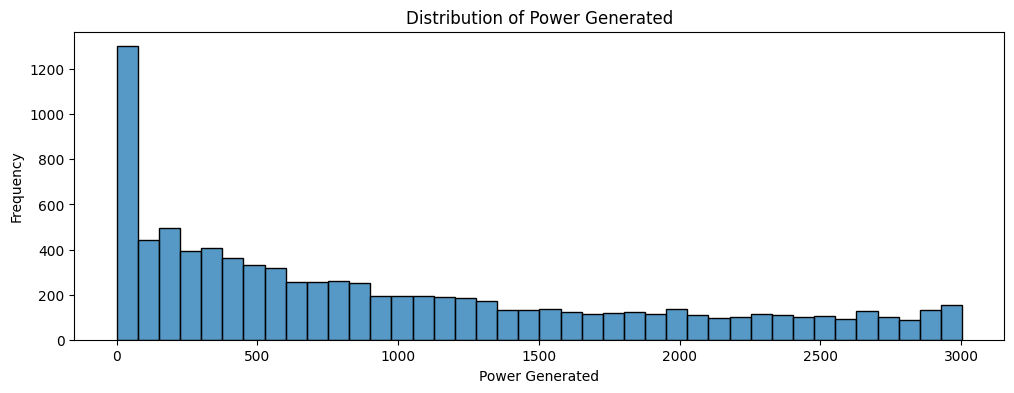

In [28]:
# Univariate Analysis: power generated, wind speed, direction, tempretaure, and pressure

# distribution of power generated

plt.figure(figsize=(12, 4))
sns.histplot(data['power_generated'], bins = 40)
plt.title('Distribution of Power Generated')
plt.xlabel('Power Generated')
plt.ylabel('Frequency')
plt.show()

It is noticeable that there are lots of zero values in power generated, which means that there are times the turbine was not generating power at all

In [29]:
avg_power_generated = round(data.power_generated.mean(), 2)
print(f'The average power generated is {avg_power_generated}Kw')

The average power generated is 964.47Kw


In [30]:
# wholesome statistics report of the power generated
stat_power_generated = round(data.power_generated.describe(), 2)
stat_power_generated

count    8760.00
mean      964.47
std       878.56
min         0.00
25%       215.95
50%       693.97
75%      1562.29
max      3004.01
Name: power_generated, dtype: float64

In [31]:
# selecting out null power generated rows
zero_generated = data[data['power_generated'] == 0]
zero_generated

,power_generated,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,0,1,1,1,Winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,22,1,1,1,Winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,23,1,1,1,Winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,0,1,1,1,Winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,23,52,12,4,Winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,0,52,12,4,Winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,1,52,12,4,Winter


There are 822 instances

In [32]:
# getting count of the seasons when no power was generated

season_count = zero_generated.season.value_counts()
season_count

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

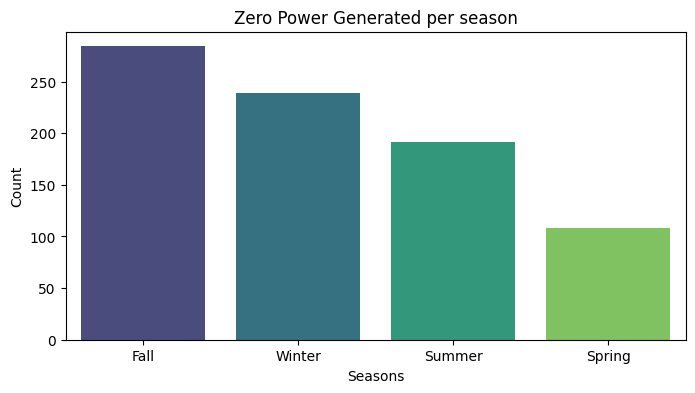

In [33]:
# bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=season_count.index, y=season_count, palette= 'viridis')
plt.title('Zero Power Generated per season')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

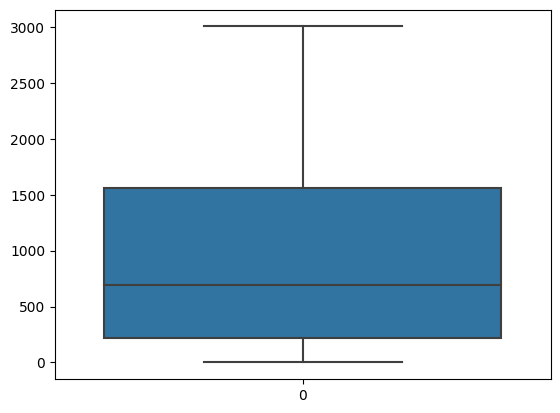

In [34]:
# checking for outliers in power generated using box plot
sns.boxplot(data['power_generated']);

Power generated column is void of outliers

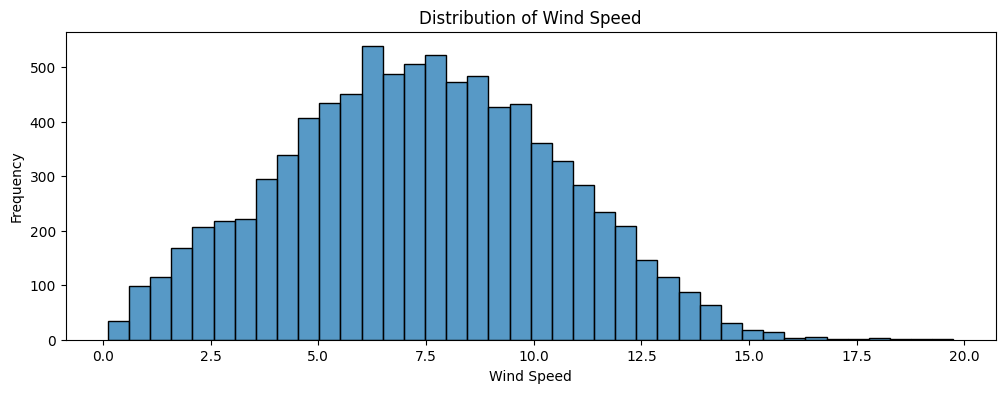

In [35]:
# distribution of wind speed
plt.figure(figsize=(12, 4))
sns.histplot(data['wind_speed'], bins = 40)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

The speed of the wind is a normally distributed

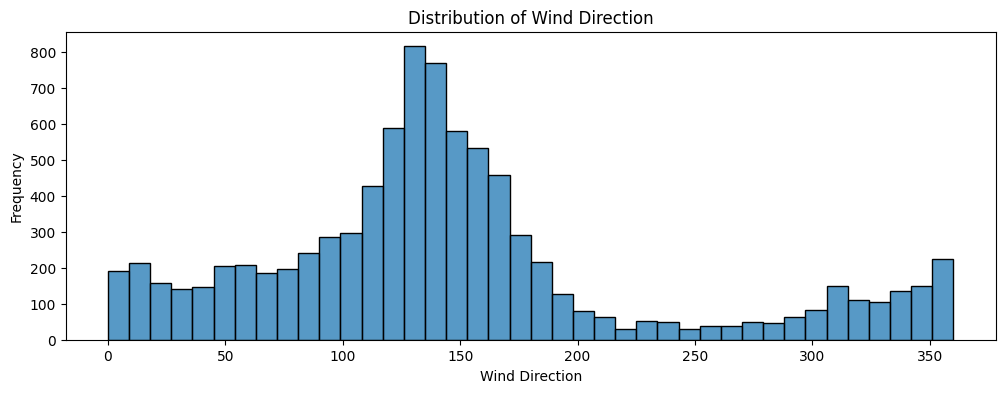

In [36]:
# distribution of wind direction
plt.figure(figsize=(12, 4))
sns.histplot(data['wind_direction'], bins = 40)
plt.title('Distribution of Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.show()

Distribution of wind direction is not strictly normal

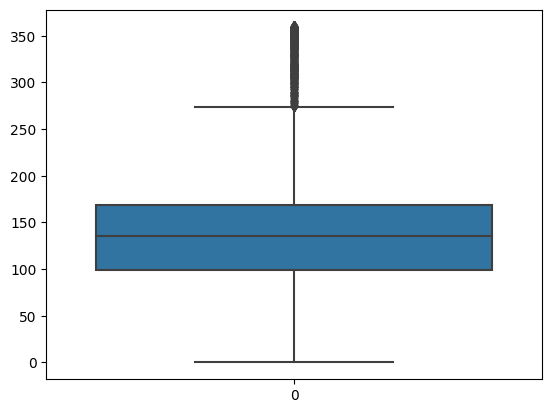

In [37]:
sns.boxplot(data['wind_direction']);

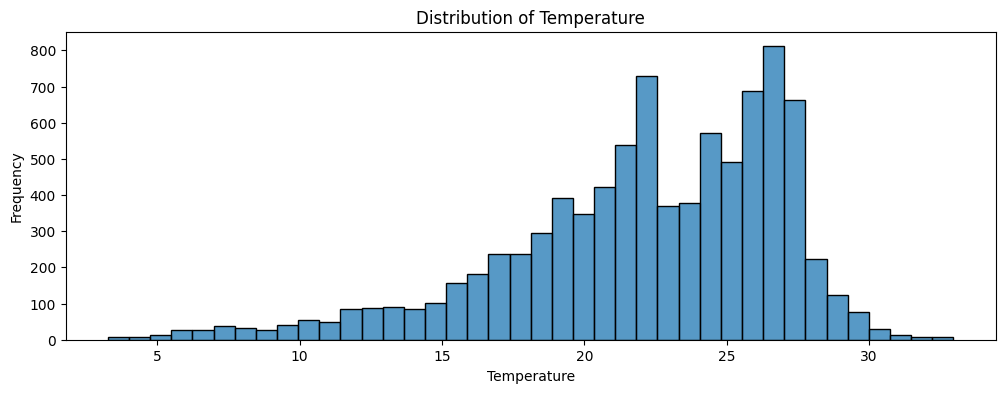

In [38]:
# distribution of temperature
plt.figure(figsize=(12, 4))
sns.histplot(data['temperature'], bins = 40)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

Temperature is right skewed probably due to the fact that warm days are more than cold days

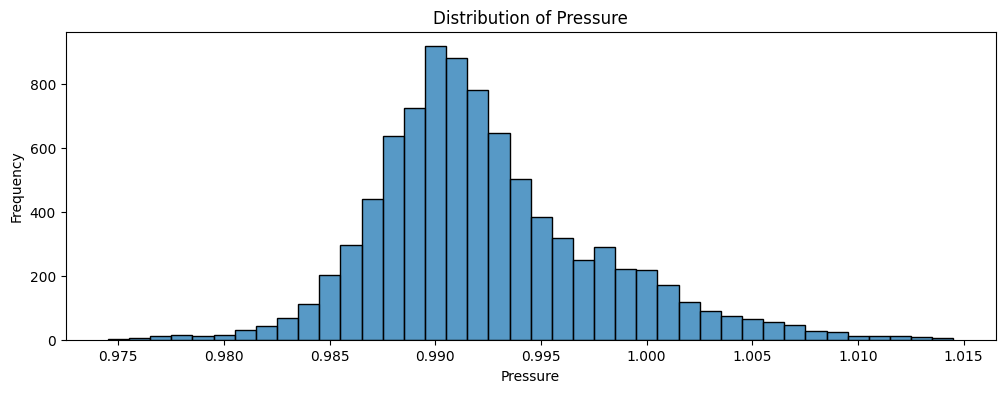

In [39]:
# distribution of pressure values
plt.figure(figsize=(12, 4))
sns.histplot(data['pressure'], bins = 40)
plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

#### Multivariate analysis

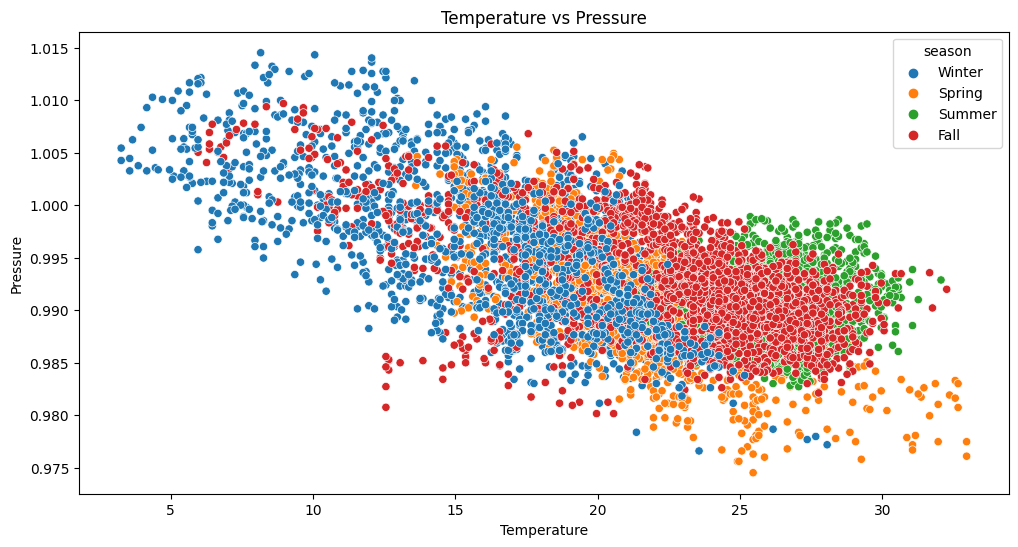

In [40]:
# temperature vs pressure by season

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temperature', y='pressure', hue='season')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

Winter: colder days(lower temperature, <20)

Spring: high temperature at low pressure and low temperature at high pressure

Summer: high temperature

Fall: widest range of temperature and pressure


In [41]:
# temperature vs pressure by power generated
# creating bins of power generated values
num_bins = 4
binned_data = pd.cut(data['power_generated'], bins=num_bins)

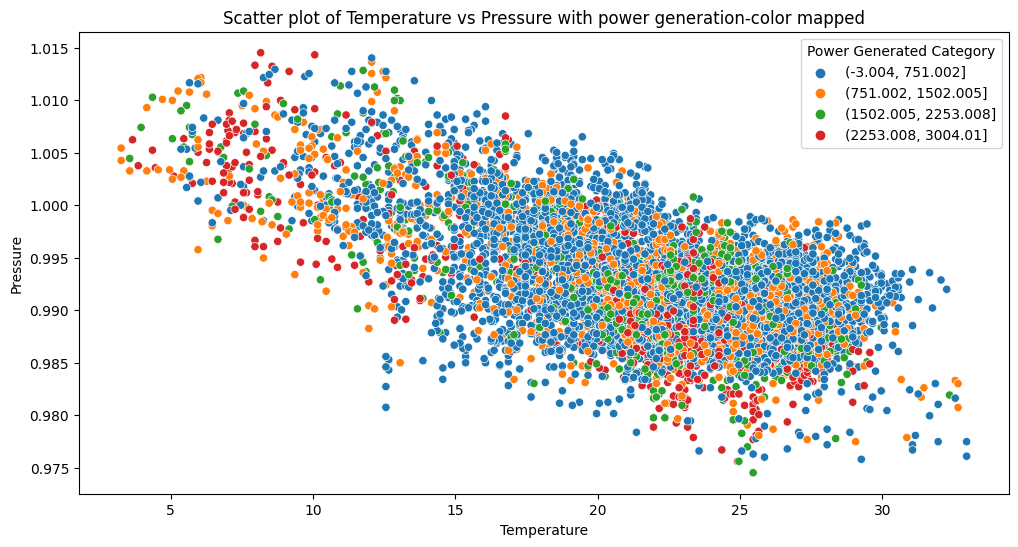

In [42]:
# temperature vs pressure by power generated
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temperature', y='pressure', hue= binned_data)
plt.title('Scatter plot of Temperature vs Pressure with power generation-color mapped')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(title='Power Generated Category', loc='upper right')
plt.show()

Majority of power generated are withing -3.004 Kw and 751.002 Kw

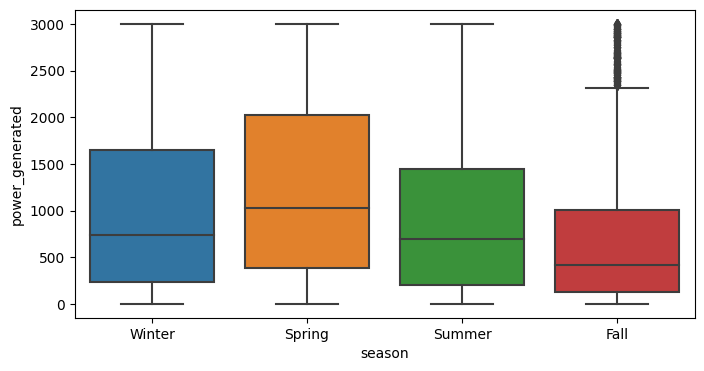

In [43]:
# observing the effect of seasons on power generated
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='season', y='power_generated');

Spring has the highest average power generated, which makes it the most productive season for power generation, 

while fall has the lowest power generated, which makes it the least productive season for power generation.

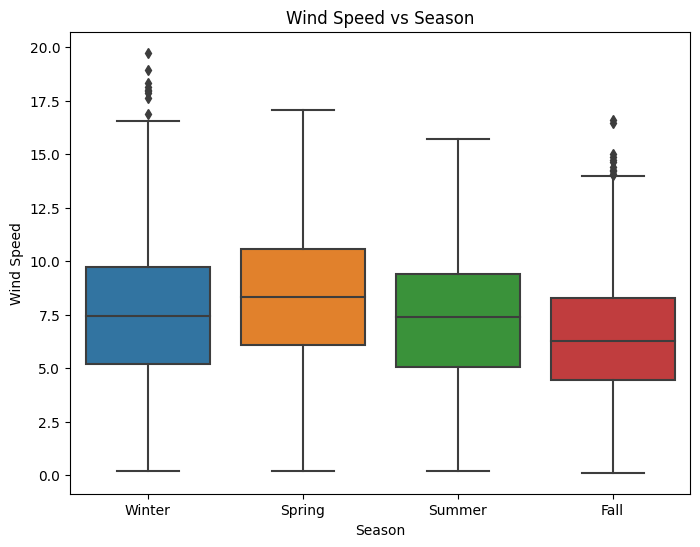

In [44]:
# wind characteristics

# boxplot wind speed vs season
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='season', y='wind_speed')
plt.title('Wind Speed vs Season')
plt.xlabel('Season')
plt.ylabel('Wind Speed');

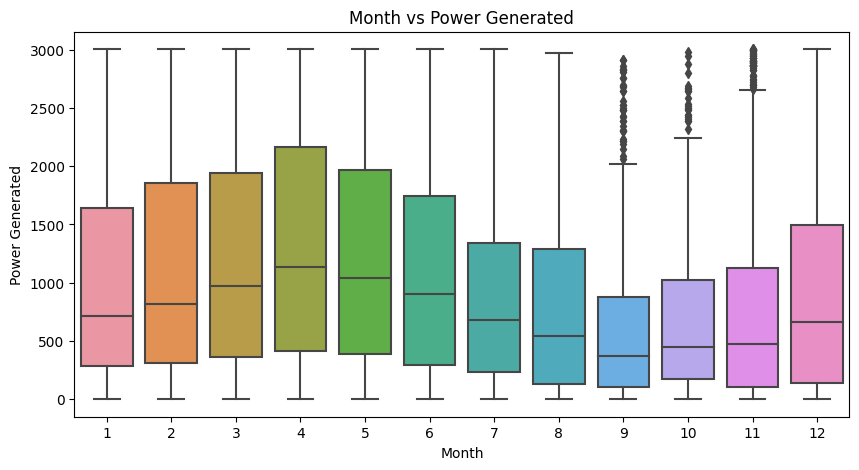

In [45]:
# month and power generated
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='month', y='power_generated')
plt.title('Month vs Power Generated')
plt.xlabel('Month')
plt.ylabel('Power Generated');

Power generation fluctuates throught the year with the first six months showing higher power generation than the last six months. <br>
It is also notable that the power generation seems to pick up again in the month of December.

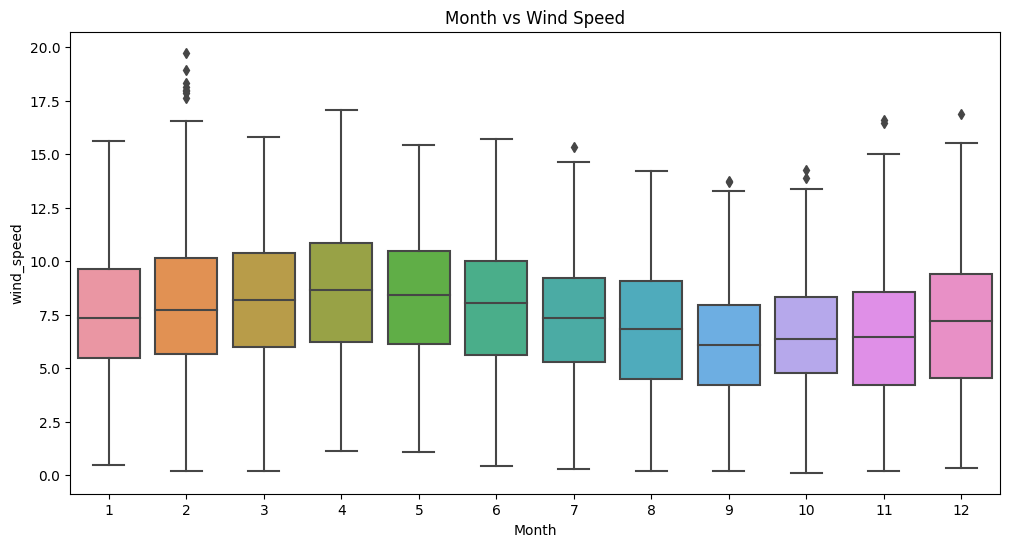

In [46]:
# months and wind speed
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='month', y='wind_speed')
plt.title('Month vs Wind Speed')
plt.xlabel('Month');

The same kind of pattern for month versus power generated also exists for month versus wind speed.

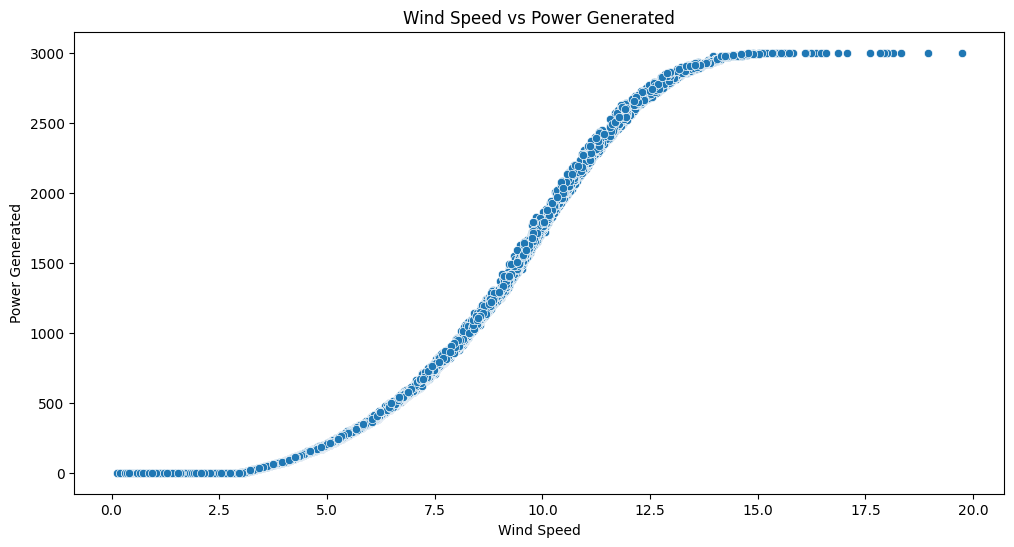

In [47]:
# wind speed versus power generated
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='wind_speed', y='power_generated')
plt.title('Wind Speed vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated');

Generally, as the wind speed increases, the power generation also increases. <br>
Power generation is minimal from 0 m/s to 5 m/s, power generation is minimal, while power generation rises sharply from around 5 m/s to 12 m/s. <br>
From 12 m/s onward, power generation begins to level off, indicating that the turbine reaches its maximum power capacity.

In [48]:
# checking the wind direction
data['wind_direction']

Time stamp
2021-01-01 00:00:00    128
2021-01-01 01:00:00    135
2021-01-01 02:00:00    142
2021-01-01 03:00:00    148
2021-01-01 04:00:00    150
                      ... 
2021-12-31 19:00:00    129
2021-12-31 20:00:00    118
2021-12-31 21:00:00    117
2021-12-31 22:00:00    116
2021-12-31 23:00:00    121
Name: wind_direction, Length: 8760, dtype: int64

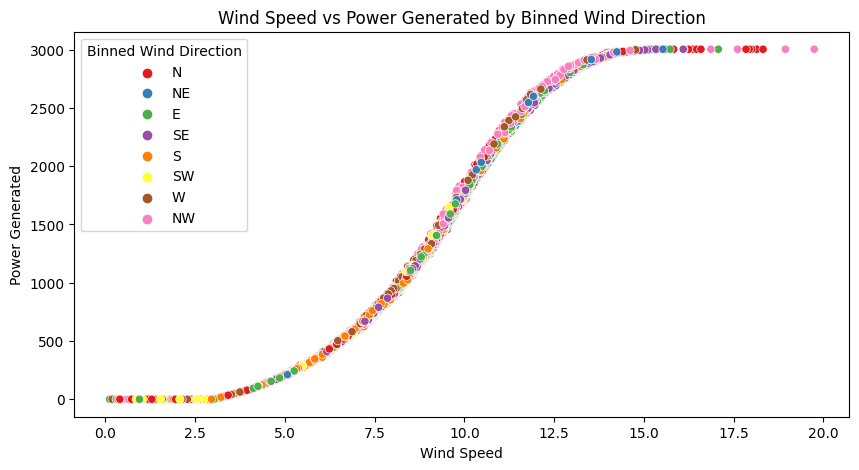

In [49]:
bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

bin_edges = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

binned_data = pd.cut(data['wind_direction'], bins=bin_edges, labels=bin_labels)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='wind_speed', y='power_generated', hue=binned_data, palette='Set1')
plt.title('Wind Speed vs Power Generated by Binned Wind Direction')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')
plt.legend(title='Binned Wind Direction', loc='upper left')
plt.show()

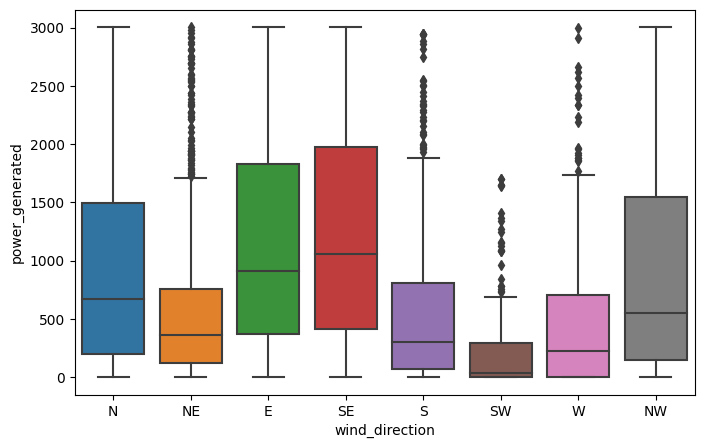

In [50]:
# binned_data vs power_generated
plt.figure(figsize=(8, 5))
sns.boxplot(x=binned_data, y=data['power_generated']);

Wind direction also has influence on power generation with E and SE having the highest power generation and SW has the lowest.

In [51]:
# Adding the wind orientation feature
data['wind_orientation'] = binned_data

data.head()

,power_generated,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,0,53,1,1,Winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,53,1,1,Winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,2,53,1,1,Winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,3,53,1,1,Winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,4,53,1,1,Winter,SE


In [52]:
# checking unique wind orientation
data['wind_orientation'].unique()

['E', 'SE', 'N', 'NW', 'W', 'SW', 'NE', 'S']
Categories (8, object): ['N' < 'NE' < 'E' < 'SE' < 'S' < 'SW' < 'W' < 'NW']

## Encoding and Modelling

In [53]:
data.columns

Index(['power_generated', 'wind_speed', 'wind_direction', 'pressure',
       'temperature', 'hour', 'week', 'month', 'quarter', 'season',
       'wind_orientation'],
      dtype='object')

In [54]:
#checking the length of the data
len(data)

8760

In [55]:
# check the last 30% of the data
len(data) * 0.3

2628.0

In [56]:
# splitting the data manually instead of picking randomly
train_data = data[int(len(data) * 0.3):]
test_data = data[:int(len(data) * 0.3)]

train_data.shape, test_data.shape

train_data.shape, test_data.shape

((6132, 11), (2628, 11))

In [57]:
# perform mean encoding for season
season_mean_encoded = train_data.groupby('season')['power_generated'].mean()
season_mean_encoded

season
Fall       697.639070
Spring    1265.494478
Summer     927.663718
Winter     913.915094
Name: power_generated, dtype: float64

In [58]:
data['season_mean_encoded'] = data['season'].map(season_mean_encoded)

In [59]:
# perform mean encoding for wind orientation
wind_orientation_mean_encoded = train_data.groupby('wind_orientation')['power_generated'].mean()
wind_orientation_mean_encoded

wind_orientation
N      768.736907
NE     534.976110
E     1136.434987
SE    1096.718901
S      485.235529
SW     211.638731
W      428.122191
NW     878.859017
Name: power_generated, dtype: float64

In [60]:
data['wind_orientation_mean_encoded'] = data['wind_orientation'].map(wind_orientation_mean_encoded)

In [61]:
data.head()

,power_generated,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season,wind_orientation,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,0,53,1,1,Winter,E,913.915094,1136.434987
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,53,1,1,Winter,E,913.915094,1136.434987
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,2,53,1,1,Winter,SE,913.915094,1096.718901
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,3,53,1,1,Winter,SE,913.915094,1096.718901
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,4,53,1,1,Winter,SE,913.915094,1096.718901


In [62]:
# drop season and wind orientation columns
data.drop(['season', 'wind_orientation'], axis=1, inplace=True)

In [63]:
train_data = data[int(len(data) * 0.3):]
test_data = data[:int(len(data) * 0.3)]

train_data.shape, test_data.shape

((6132, 11), (2628, 11))

In [64]:
train_data.head()

,power_generated,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,
2021-04-20 12:00:00,2310.39,11.250,125,0.988237,22.363,12,16,4,2,1265.494478,1136.434987
2021-04-20 13:00:00,2555.48,11.933,126,0.990903,22.163,13,16,4,2,1265.494478,1136.434987
2021-04-20 14:00:00,2656.18,12.279,128,0.987843,22.063,14,16,4,2,1265.494478,1136.434987
2021-04-20 15:00:00,2714.59,12.546,127,0.986659,21.963,15,16,4,2,1265.494478,1136.434987
2021-04-20 16:00:00,2775.78,12.822,125,0.985770,21.763,16,16,4,2,1265.494478,1136.434987


### Modelling

linear models : linear regression

support vector machines : support vector regression

ensemble method : random forest regressor, gradient boost regressor

In [65]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
# selecting X and y train and test values
target = 'power_generated'
features = ['wind_speed', 'wind_direction', 'pressure', 'temperature',
       'hour', 'week', 'month', 'quarter', 'season_mean_encoded',
       'wind_orientation_mean_encoded']

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [67]:
# linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [68]:
# random forest regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [69]:
# svr
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [70]:
# gradient boosting regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [71]:
# making predictions and evaluating
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [72]:
# evaluate with mean squared error
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

In [73]:
print("Linear Regression MSE:", lr_mse)
print("Random Forest Regression MSE:", rf_mse)
print("Support Vector Regression MSE:", svr_mse)
print("Gradient Boosting Regression MSE:", gb_mse)

Linear Regression MSE: 70382.87918665392
Random Forest Regression MSE: 89.49707433816599
Support Vector Regression MSE: 994055.1370320625
Gradient Boosting Regression MSE: 81.17117689135964


In [74]:
# evaluate with mean absolute error
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

In [75]:
print("Linear Regression MAE:", lr_mae)
print("Random Forest Regression MAE:", rf_mae)
print("Support Vector Regression MAE:", svr_mae)
print("Gradient Boosting Regression MAE:", gb_mae)

Linear Regression MAE: 223.6599939378124
Random Forest Regression MAE: 5.7472194475113545
Support Vector Regression MAE: 763.4574786658496
Gradient Boosting Regression MAE: 6.494107069874759


In [76]:
y_test.mean()

1117.362463089041

Hyperparameter tunning on gradiennt boosting regressor and randon forest

**HYPERPARAMETER TUNING USING HYPEROPT AND BAYESIAN OPTIMIZATION**

Hyperparameter tuning is a crucial step in optimizing maching learning models. HyperOpt is a Python library that provides a convenient way to perform hyperparameter tuning using Bayesian optimization techniques. Bayesian optimization ia a probabilistic model-based optimizatiion method that can efficiently search the hyperparameter space to find the optimal set of hyperparameters for a given machine learning model.

space/set of hyperparameters ==> optimal values of each hyperparameter

In [77]:
len(X_train)

6132

In [78]:
X_val = X_train[:int(len(X_train) * 0.2)]
y_val = y_train[:int(len(y_train) * 0.2)]

X_train = X_train[int(len(X_train) * 0.2):]
y_train = y_train[int(len(y_train) * 0.2):]

In [79]:
len(X_train)

4906

In [80]:
len(X_val)

1226

In [81]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# create a space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

# objective function
def objective(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])
    max_features = params['max_features']

    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        random_state=RSEED
    )

    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_rf)

    return {'loss': mse, 'status': STATUS_OK}

# minimize the objective: fmin
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
print('Best Hyperparameters :', best)

100%|██████████| 100/100 [02:12<00:00,  1.33s/trial, best loss: 40.18233287658622]
Best Hyperparameters : {'max_depth': 16.0, 'max_features': 2, 'n_estimators': 115.0}


In [82]:
best_rf_hyperparameters = {'max_depth': best['max_depth'], 'max_features': best['max_features'], 'n_estimators': best['n_estimators']}
best_rf_hyperparameters

{'max_depth': 16.0, 'max_features': 2, 'n_estimators': 115.0}

In [83]:
# create a space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.1, 1.0)

}

# objective function
def objective1(params):
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])


    gb_model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        random_state=RSEED
    )

    gb_model.fit(X_train, y_train)
    y_pred_rf = gb_model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_rf)

    return {'loss': mse, 'status': STATUS_OK}

# minimize the objective: fmin
trials = Trials()
best_gb = fmin(fn=objective1, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
print('Best Hyperparameters_gb :', best_gb)

100%|██████████| 100/100 [02:43<00:00,  1.63s/trial, best loss: 16.339701616937653]
Best Hyperparameters_gb : {'learning_rate': 0.02829055386200688, 'max_depth': 7.0, 'n_estimators': 297.0, 'subsample': 0.6491904969530151}


In [84]:
best_gb_hyperparameters = {'learning_rate': best_gb['learning_rate'], 
                           'max_depth': best_gb['max_depth'], 
                           'n_estimators': best_gb['n_estimators'], 
                           'subsample': best_gb['subsample']}

best_gb_hyperparameters

{'learning_rate': 0.02829055386200688,
 'max_depth': 7.0,
 'n_estimators': 297.0,
 'subsample': 0.6491904969530151}

In [85]:
train_data = data[int(len(data) * 0.3):]
test_data = data[:int(len(data) * 0.3)]

In [86]:
# selecting X and y train and test values
target = 'power_generated'
features = ['wind_speed', 'wind_direction', 'pressure', 'temperature',
       'hour', 'week', 'month', 'quarter', 'season_mean_encoded',
       'wind_orientation_mean_encoded']

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

In [87]:
best_rf_hyperparameters

{'max_depth': 16.0, 'max_features': 2, 'n_estimators': 115.0}

In [88]:
rf_model = RandomForestRegressor(
    n_estimators=int(best_rf_hyperparameters['n_estimators']),
    max_depth=int(best_rf_hyperparameters['max_depth']),
    max_features=best_rf_hyperparameters['max_features'],
    random_state=RSEED
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse_tuned = mean_squared_error(y_test, rf_predictions)
rf_mae_tuned = mean_absolute_error(y_test, rf_predictions)

print("Random Forest Regression MSE:", rf_mse_tuned)
print("Random Forest Regression MAE:", rf_mae_tuned)

Random Forest Regression MSE: 57432.92329944427
Random Forest Regression MAE: 179.8095193718503


In [89]:
# a case of overfitting

In [90]:
best_gb_hyperparameters

{'learning_rate': 0.02829055386200688,
 'max_depth': 7.0,
 'n_estimators': 297.0,
 'subsample': 0.6491904969530151}

In [91]:
gb_model = GradientBoostingRegressor(
    n_estimators=int(best_gb_hyperparameters['n_estimators']),
    max_depth=int(best_gb_hyperparameters['max_depth']),
    learning_rate=best_gb_hyperparameters['learning_rate'],
    subsample=best_gb_hyperparameters['subsample'],
    random_state=RSEED
)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

gb_mse_tuned = mean_squared_error(y_test, gb_predictions)
gb_mae_tuned = mean_absolute_error(y_test, gb_predictions)

print("Gradient Boosting Regression MSE:", gb_mse_tuned)
print("Gradient Boosting Regression MAE:", gb_mae_tuned)

Gradient Boosting Regression MSE: 24.701208477911177
Gradient Boosting Regression MAE: 3.0517484473258647


# ***The overall best performing model is the Gradient Boosting Regressor using the best hyperparameters***

**INFERENCE SCRIPT CREATION**

In [92]:
data = pd.read_csv('/Users/olugbengaoloyade/Documents/Renewable-Energy-Forecast-/TexasTurbine.csv')

features = data.sample(5)

features

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
1425,"Mar 1, 09:00 am",721.943,7.425,150,0.993371,21.663
7524,"Nov 10, 12:00 pm",1996.000,10.430,3,0.994855,17.063
7824,"Nov 23, 12:00 am",344.882,5.843,11,0.996533,17.663
1835,"Mar 18, 11:00 am",0.000,0.692,177,0.990511,18.463
2242,"Apr 4, 10:00 am",962.140,8.265,236,0.984580,29.063


In [93]:
features.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [94]:
features.columns = ['time_stamp', 'power_generated', 'wind_speed',
       'wind_direction', 'pressure', 'temperature']

target = features['power_generated']

In [95]:

features.drop('power_generated', axis=1, inplace=True)

In [96]:
features

,time_stamp,wind_speed,wind_direction,pressure,temperature
1425,"Mar 1, 09:00 am",7.425,150,0.993371,21.663
7524,"Nov 10, 12:00 pm",10.430,3,0.994855,17.063
7824,"Nov 23, 12:00 am",5.843,11,0.996533,17.663
1835,"Mar 18, 11:00 am",0.692,177,0.990511,18.463
2242,"Apr 4, 10:00 am",8.265,236,0.984580,29.063


In [97]:
def fix_time_stamp(data):
    """
    this function converts date time column to proper format and makes it the index of the dataframe
    """

    # fixing the time stamp column
    data['time_stamp'] = pd.to_datetime(data['time_stamp'], format= '%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')

    # replacing the year with 2021(which is the actual year)
    data['time_stamp'] = data['time_stamp'].str.replace('1900', '2021')  #, regex=True

    # converting to time stamp
    data['time_stamp'] = pd.to_datetime(data['time_stamp'])

    # set time_stamp as the index
    data.index = data['time_stamp']

    # drop theold index
    data.drop('time_stamp', axis=1, inplace=True)

    return data

In [98]:
fix_time_stamp(features)

,wind_speed,wind_direction,pressure,temperature
time_stamp,,,,
2021-03-01 09:00:00,7.425,150,0.993371,21.663
2021-11-10 12:00:00,10.430,3,0.994855,17.063
2021-11-23 00:00:00,5.843,11,0.996533,17.663
2021-03-18 11:00:00,0.692,177,0.990511,18.463
2021-04-04 10:00:00,8.265,236,0.984580,29.063


In [99]:
features = extract_features(features)
features

,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter
time_stamp,,,,,,,,
2021-03-01 09:00:00,7.425,150,0.993371,21.663,9,9,3,1
2021-11-10 12:00:00,10.430,3,0.994855,17.063,12,45,11,4
2021-11-23 00:00:00,5.843,11,0.996533,17.663,0,47,11,4
2021-03-18 11:00:00,0.692,177,0.990511,18.463,11,11,3,1
2021-04-04 10:00:00,8.265,236,0.984580,29.063,10,13,4,2


In [100]:
features['season'] = features['month'].apply(map_month_to_season)

features

,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season
time_stamp,,,,,,,,,
2021-03-01 09:00:00,7.425,150,0.993371,21.663,9,9,3,1,Spring
2021-11-10 12:00:00,10.430,3,0.994855,17.063,12,45,11,4,Fall
2021-11-23 00:00:00,5.843,11,0.996533,17.663,0,47,11,4,Fall
2021-03-18 11:00:00,0.692,177,0.990511,18.463,11,11,3,1,Spring
2021-04-04 10:00:00,8.265,236,0.984580,29.063,10,13,4,2,Spring


In [101]:
def bin_wind_direction(data):
  """
  this function takes in data, converts the wind direction columin degrees to cardinal points and assigns it to a new column
  """
  # Define bin edges for wind direction
  bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

  bin_edges = [-1, 45, 90, 135, 180, 225, 270, 315, 360]

  # Bin the wind_direction column and assign labels
  binned_data = pd.cut(data['wind_direction'], bins=bin_edges, labels=bin_labels)

  data['wind_orientation'] = binned_data

  return data

In [102]:
features = bin_wind_direction(features)
features

,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season,wind_orientation
time_stamp,,,,,,,,,,
2021-03-01 09:00:00,7.425,150,0.993371,21.663,9,9,3,1,Spring,SE
2021-11-10 12:00:00,10.430,3,0.994855,17.063,12,45,11,4,Fall,N
2021-11-23 00:00:00,5.843,11,0.996533,17.663,0,47,11,4,Fall,N
2021-03-18 11:00:00,0.692,177,0.990511,18.463,11,11,3,1,Spring,SE
2021-04-04 10:00:00,8.265,236,0.984580,29.063,10,13,4,2,Spring,SW


In [103]:
def mean_encode(data, season_mean = season_mean_encoded, wind_mean = wind_orientation_mean_encoded):
  data['season_mean_encoded'] = data['season'].map(season_mean_encoded)
  data['wind_orientation_mean_encoded'] = data['wind_orientation'].map(wind_orientation_mean_encoded)
  data.drop(['season', 'wind_orientation'], axis=1, inplace=True)

  return data

In [104]:
features = mean_encode(features)
features

,wind_speed,wind_direction,pressure,temperature,hour,week,month,quarter,season_mean_encoded,wind_orientation_mean_encoded
time_stamp,,,,,,,,,,
2021-03-01 09:00:00,7.425,150,0.993371,21.663,9,9,3,1,1265.494478,1096.718901
2021-11-10 12:00:00,10.430,3,0.994855,17.063,12,45,11,4,697.639070,768.736907
2021-11-23 00:00:00,5.843,11,0.996533,17.663,0,47,11,4,697.639070,768.736907
2021-03-18 11:00:00,0.692,177,0.990511,18.463,11,11,3,1,1265.494478,1096.718901
2021-04-04 10:00:00,8.265,236,0.984580,29.063,10,13,4,2,1265.494478,211.638731


In [117]:
gb_model.predict(features)

array([1866.51255184,  486.62984215, 1198.40988673,  663.95699251,
        846.48185013])

In [105]:
target

1425     721.943
7524    1996.000
7824     344.882
1835       0.000
2242     962.140
Name: power_generated, dtype: float64

In [109]:
def inference(features, model = gb_model):
  features = fix_time_stamp(features)
  features = extract_features(features)
  features['season'] = features['month'].apply(map_month_to_season)
  features = bin_wind_direction(features)
  features = mean_encode(features)
  predictions = model.predict(features)

  return predictions

In [119]:
inference(features)

array([1866.51255184,  486.62984215, 1198.40988673,  663.95699251,
        846.48185013])

In [110]:
data = pd.read_csv('/Users/olugbengaoloyade/Documents/Renewable-Energy-Forecast-/TexasTurbine.csv')

features = data.sample(1)

features

features.columns

features.columns = ['time_stamp', 'power_generated', 'wind_speed',
       'wind_direction', 'pressure', 'temperature']

target = features['power_generated']

features.drop('power_generated', axis=1, inplace=True)

features

,time_stamp,wind_speed,wind_direction,pressure,temperature
6674,"Oct 6, 02:00 am",4.973,353,0.992185,23.763


In [111]:
inference(features)

array([192.62780866])

In [112]:
target

6674    192.729
Name: power_generated, dtype: float64